In [1]:
from __future__ import print_function, division
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

T_press =  [[998.1   995.    990.    ... 301.    295.5   271.   ]
 [297.06  297.831 298.219 ... 234.491 232.069 230.135]
 [298.349 298.195 298.212 ... 234.466 232.068 230.343]
 ...
 [297.747 298.473 298.872 ... 237.164 234.998 233.421]
 [297.114 298.129 298.687 ... 237.424 235.463 233.814]
 [296.161 297.481 298.03  ... 237.881 235.929 234.291]]
T_press shape =  (21, 57)
RH_press =  [[998.1   995.    990.    ... 301.    295.5   271.   ]
 [ 62.059  57.384  55.764 ...  33.817  34.616  33.801]
 [ 55.661  54.721  55.075 ...  30.088  30.512  29.011]
 ...
 [ 80.651  70.682  66.553 ...  23.799  23.545  25.563]
 [ 83.268  71.769  64.436 ...  23.41   24.295  25.287]
 [ 84.598  73.526  66.809 ...  25.565  26.301  27.258]]
RH_press shape =  (21, 57)
Pressure :  [998.1, 995.0, 990.0, 984.0, 978.0, 972.0, 965.5, 959.0, 952.5, 946.0, 939.7, 930.0, 920.0, 911.0, 900.0, 889.0, 877.6, 868.0, 859.0, 850.0, 839.5, 829.0, 818.5, 811.0, 804.0, 790.1, 762.8, 732.0, 714.0, 696.0, 667.0, 659.7, 636.0, 612.3, 5

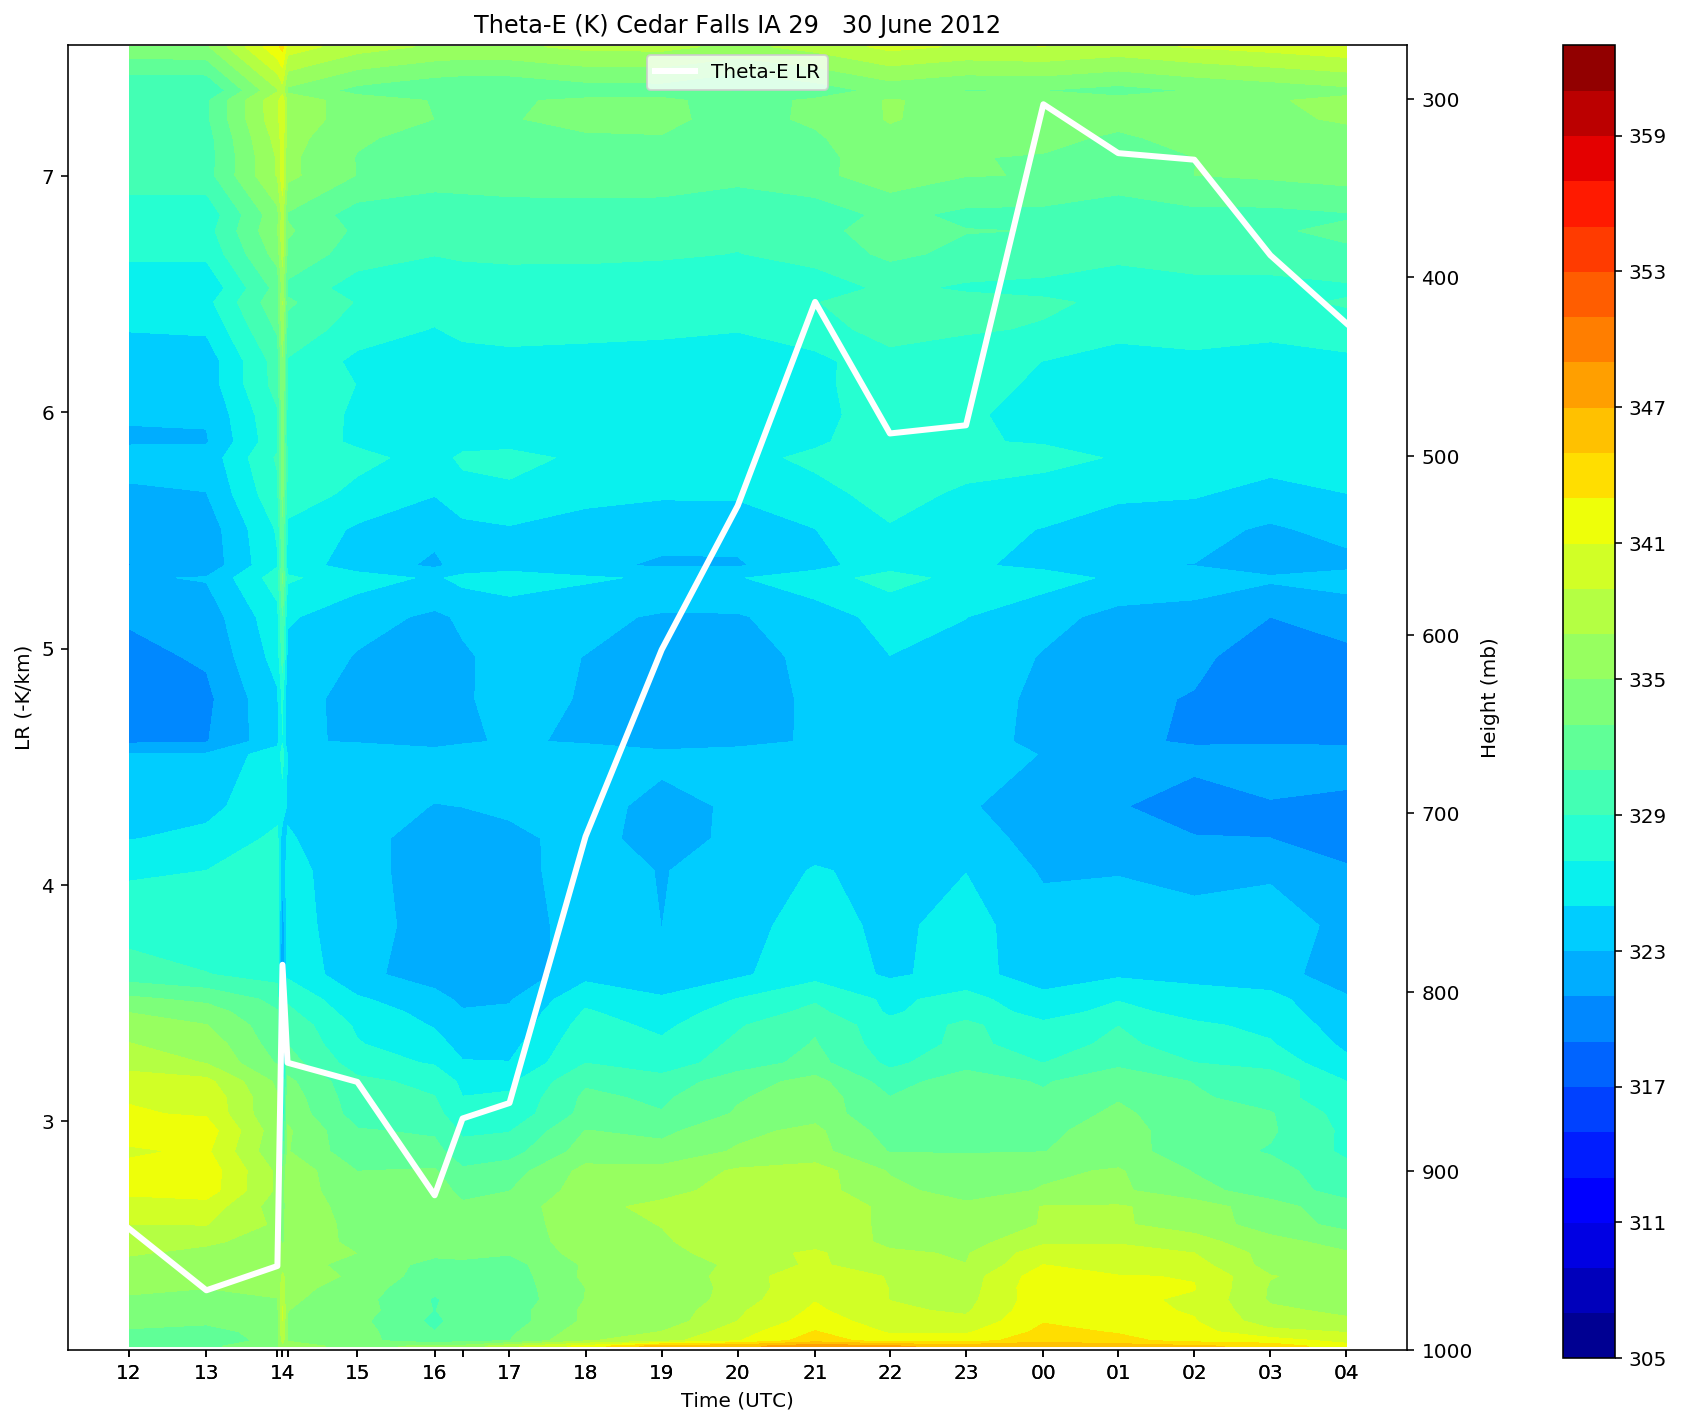

'\nfig = plt.figure(figsize=(12,12))\nax = fig.add_subplot(111) # main axes\ncf = ax.contourf(timeutc, prlevs, WBT, cmap=cm.jet, levels = levels_WBT)\nplt.ylim(1000,270)\nax.set_xticks(time)\nax.set_xticklabels(labels)\nplt.colorbar(cf)\nplt.xlabel("Time (UTC)")\nplt.ylabel("Height (mb)")\nplt.title("Wet-bulb Temperature (C) Cedar Falls IA 29-30 June 2012")\nplt.savefig("wbt_cf_0629_30.png",dpi=250,bbox_inches=\'tight\')\n#plt.grid(True)\nplt.show()\n'

In [3]:
'''
Cedar Falls MWR Hovmoller Diagrams 29-30 June 2012
'''

tprof = 'mwr_cf_0629_Tprof_12_04.txt'
rhprof = 'mwr_cf_0629_RHprof_12_04.txt'

T_press = np.loadtxt(tprof, usecols=range(1, 22), skiprows=1, unpack=True)
RH_press = np.loadtxt(rhprof, usecols=range(1, 22), skiprows=1, unpack=True)
print("T_press = ", T_press)
print("T_press shape = ", T_press.shape)
print("RH_press = ", RH_press)
print("RH_press shape = ", RH_press.shape)

T = T_press[1:22,:]
T_K = T.T
RH = RH_press[1:22,:]
RH_pct = RH.T
pressure_mb = T_press[0,:]
press = pressure_mb.tolist()
print("Pressure : ", press, len(press))
time = [720,781,837,841,845,900,961,983,1020,1080,1140,1200,1261,1320,1380,1441,1500,1560,1620,1680]
maxpress = max(press)
minpress = min(press)
maxtime = max(time)
mintime = min(time)
print("Latest time = ", maxtime)
timez = np.array([720,781,837,841,845,900,961,983,1020,1080,1140,1200,1261,1320,1380,1441,1500,1560,1620,1680])
print("Time: ", time, len(time))
print("Pressure in mb: ", pressure_mb, pressure_mb.shape)
print("Temperature in K: ", T_K, T_K.shape)
T_C = T_K - 273.15
timeutc, prlevs = np.meshgrid(timez, pressure_mb)
print("Time: ", timeutc, timeutc.shape)
print("Pr levels: ", prlevs, prlevs.shape)
TD_C = 243.04*((np.log(RH_pct/100))+((17.625*T_C)/(243.04+T_C)))/(17.625-(np.log(RH_pct/100))-((17.625*T_C)/(243.04+T_C)))
TD = TD_C + 273.15
WBT = T_C*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(T_C+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
Theta = T_K*((1000/prlevs)**0.286)
print("Theta in K: ", Theta, Theta.shape)
TH_min = np.amin(Theta)
TH_max = np.amax(Theta)
T_min = np.amin(T_K)
T_max = np.amax(T_K)
RH_min = np.amin(RH_pct)
RH_max = np.amax(RH_pct)
TD_C_min = np.amin(TD_C)
TD_C_max = np.amax(TD_C)
WBT_min = np.amin(WBT)
WBT_max = np.amax(WBT)
print("Theta min, Theta max = %f K %f K" % (TH_min, TH_max))
print("Temp min, Temp max = %f K %f K" % (T_min, T_max))
print("RH min, RH max = %f %f" % (RH_min, RH_max))
print("TD min, TD max = %f %f" % (TD_C_min, TD_C_max))
print("WBT min, WBT max = %f %f" % (WBT_min, WBT_max))

ThetaE = (273.15 + T_C)*((1000/prlevs)**0.286)+(3 * (RH_pct * (3.884266 * 10**
         ((7.5 * T_C)/(237.7 + T_C)))/100))
THe_sfc = ThetaE[1,:]
THe_top = ThetaE[29,:]
delta_zkm = 3.15
THe_min = np.amin(ThetaE)
THe_max = np.amax(ThetaE)
THe_mean = np.mean(ThetaE)
print("Thetae: ", ThetaE, ThetaE.shape)
print("Thetae min, Thetae max = %f K %f K" % (THe_min, THe_max))

levels_TH = np.arange(290,370,2)
levels_T = np.arange(225,310,2)
levels_RH = np.arange(20,100,2)
levels_TE = np.arange(305,365,2)
levels_WBT = np.arange(-45,25,0.5)
labels = ['12', '13', '', '14', '', '15', '16', '', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04']

gamma_ThetaE = (THe_sfc - THe_top)/(delta_zkm)
print("Gamma Theta-e = ", gamma_ThetaE)
"""
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, T_K, cmap=cm.jet, levels = levels_T)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Temperature (K) Cedar Falls IA 29-30 June 2012")
plt.savefig("tempK_cf_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, Theta, cmap=cm.jet, levels = levels_TH)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta (K) Cedar Falls IA 29-30 June 2012")
plt.savefig("thta_cf_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta-E (K) Cedar Falls IA 29-30 June 2012")
plt.savefig("thtae_cf_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()
"""
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111) # main axes
cf = ax1.contourf(timeutc, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
ax1.set_ylim(1000,270)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_xticks(time)
ax1.set_xticklabels(labels)
ax1.set_xlabel("Time (UTC)")
ax1.set_ylabel("Height (mb)")
ax1.set_title("Theta-E (K) Cedar Falls IA 29   30 June 2012")
ax2 = fig.add_subplot(111, sharex=ax1, frameon=False) # main axes
ax2.plot(timez,gamma_ThetaE,color='white',linewidth=3,label='Theta-E LR')
ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("LR (-K/km)")
ax2.legend(loc='upper center')
# Adding the colorbar
cbaxes = fig.add_axes([0.99, 0.12, 0.03, 0.76]) 
cb = plt.colorbar(cf,cax = cbaxes)
plt.savefig("thtae_lr_cf_0629_30.png",dpi=700,bbox_inches='tight')
plt.show()
"""
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, WBT, cmap=cm.jet, levels = levels_WBT)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Wet-bulb Temperature (C) Cedar Falls IA 29-30 June 2012")
plt.savefig("wbt_cf_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()
"""

T_press =  [[998.1   995.    990.    ... 301.    295.5   271.   ]
 [299.841 298.503 297.761 ... 236.912 234.909 233.142]
 [301.298 299.174 298.114 ... 236.53  234.539 232.784]
 ...
 [296.556 297.337 297.617 ... 233.17  231.323 229.721]
 [295.618 297.235 297.899 ... 232.622 230.838 229.274]
 [294.146 296.05  296.868 ... 232.799 230.997 229.427]]
T_press shape =  (21, 57)
RH_press =  [[998.1   995.    990.    ... 301.    295.5   271.   ]
 [ 72.127  73.579  74.511 ...  19.929  19.351  18.607]
 [ 63.656  67.518  69.893 ...  18.333  17.405  16.988]
 ...
 [ 61.809  54.546  51.577 ...  22.648  22.797  21.3  ]
 [ 62.358  51.076  46.237 ...  19.816  20.889  20.603]
 [ 67.391  53.916  48.06  ...  22.985  24.522  24.303]]
RH_press shape =  (21, 57)
Pressure :  [998.1, 995.0, 990.0, 984.0, 978.0, 972.0, 965.5, 959.0, 952.5, 946.0, 939.7, 930.0, 920.0, 911.0, 900.0, 889.0, 877.6, 868.0, 859.0, 850.0, 839.5, 829.0, 818.5, 811.0, 804.0, 790.1, 762.8, 732.0, 714.0, 696.0, 667.0, 659.7, 636.0, 612.3, 5

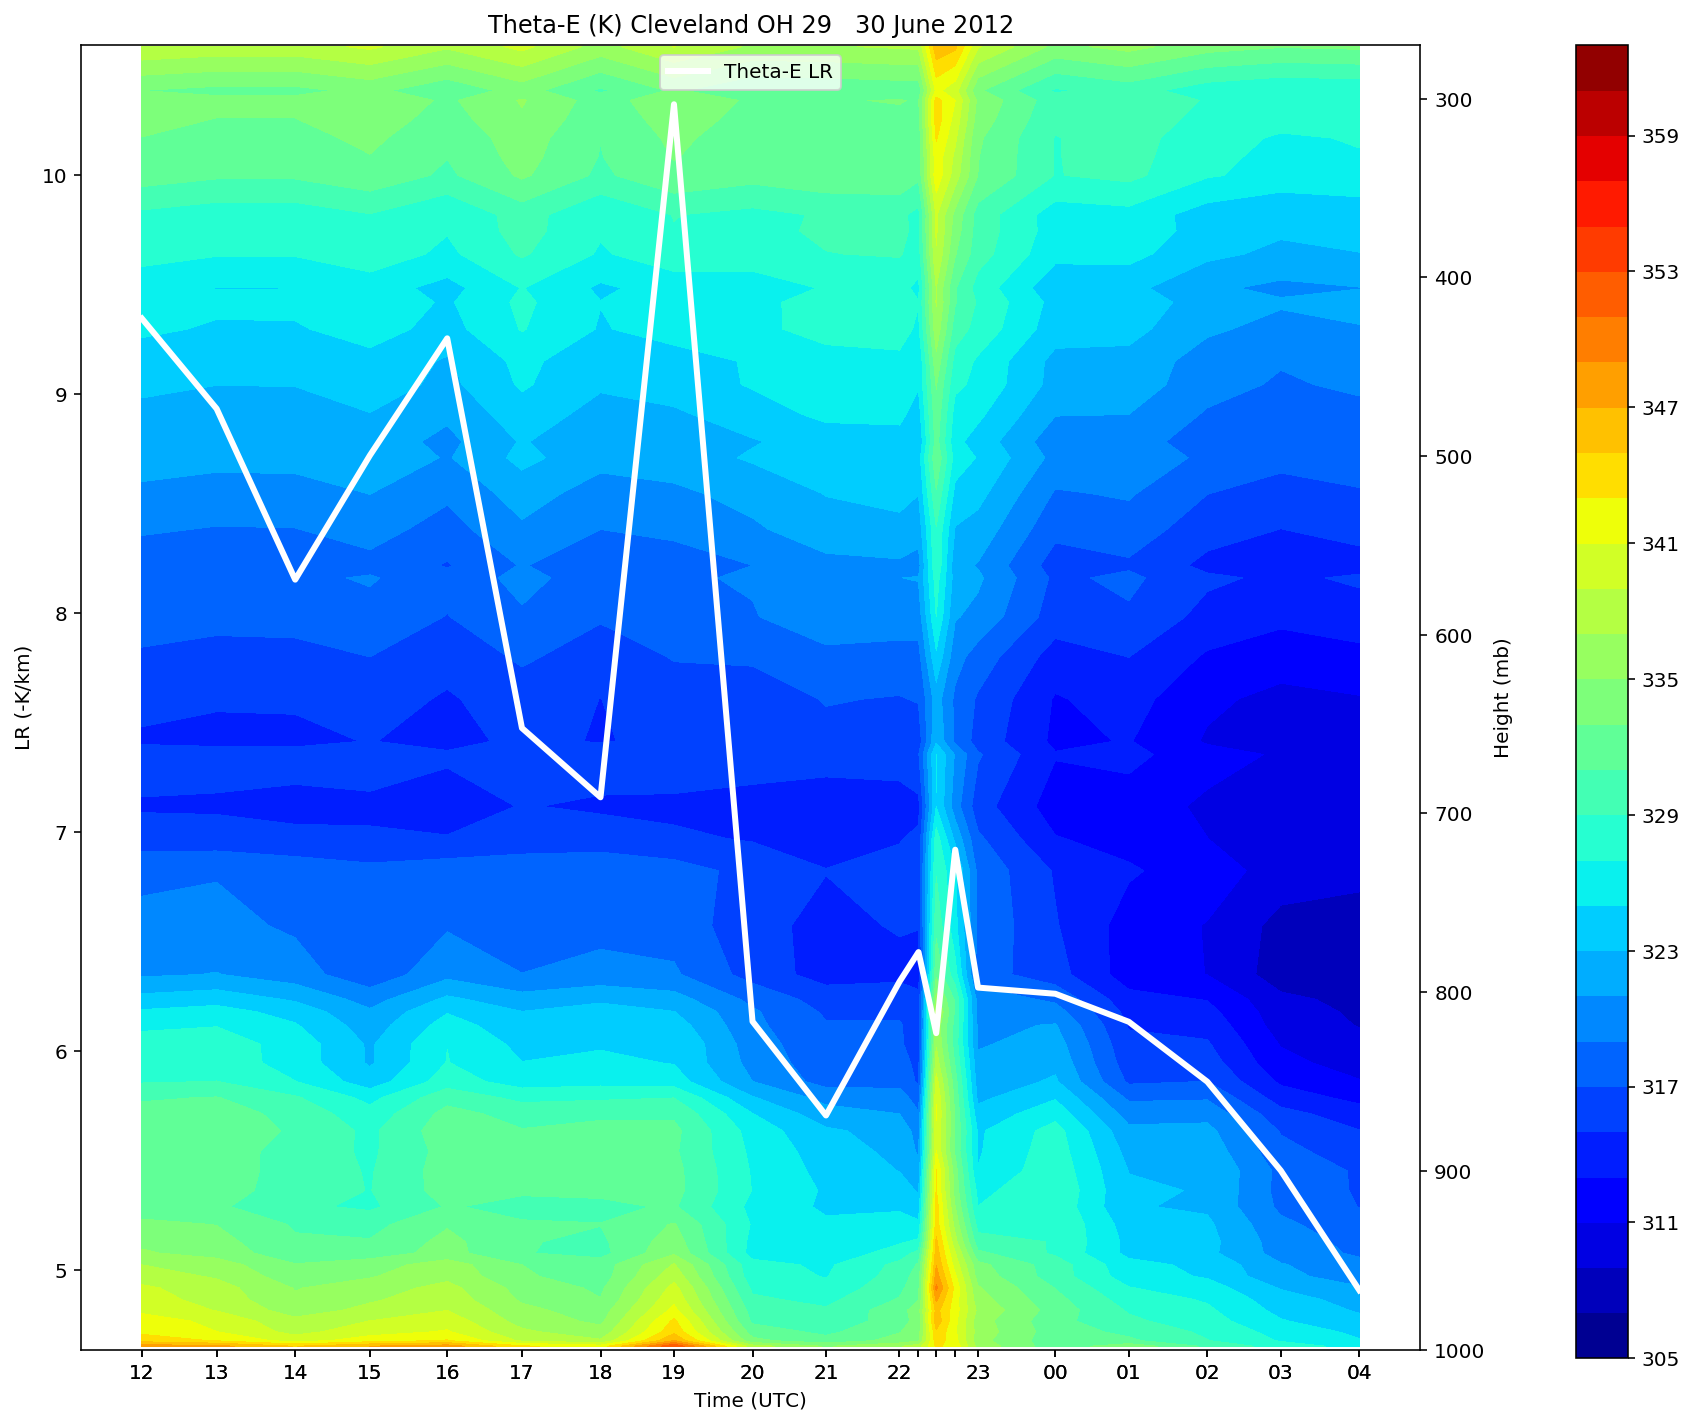

'\nfig = plt.figure(figsize=(12,12))\nax = fig.add_subplot(111) # main axes\ncf = ax.contourf(timeutc, prlevs, WBT, cmap=cm.jet, levels = levels_WBT)\nplt.ylim(1000,270)\nax.set_xticks(time)\nax.set_xticklabels(labels)\nplt.colorbar(cf)\nplt.xlabel("Time (UTC)")\nplt.ylabel("Height (mb)")\nplt.title("Wet-bulb Temperature (C) Cleveland OH 29-30 June 2012")\nplt.savefig("wbt_cle_0629_30.png",dpi=250,bbox_inches=\'tight\')\n#plt.grid(True)\nplt.show()\n'

In [4]:
'''
Cleveland MWR Hovmoller Diagrams 29-30 June 2012
'''

tprof = 'mwr_cle_0629_Tprof_12_04.txt'
rhprof = 'mwr_cle_0629_RHprof_12_04.txt'

T_press = np.loadtxt(tprof, usecols=range(1, 22), skiprows=1, unpack=True)
RH_press = np.loadtxt(rhprof, usecols=range(1, 22), skiprows=1, unpack=True)
print("T_press = ", T_press)
print("T_press shape = ", T_press.shape)
print("RH_press = ", RH_press)
print("RH_press shape = ", RH_press.shape)

T = T_press[1:22,:]
T_K = T.T
RH = RH_press[1:22,:]
RH_pct = RH.T
pressure_mb = T_press[0,:]
press = pressure_mb.tolist()
print("Pressure : ", press, len(press))
time = [720,779,841,900,961,1020,1082,1140,1202,1260,1318,1333,1347,1362,1380,1441,1499,1561,1619,1681]
maxpress = max(press)
minpress = min(press)
maxtime = max(time)
mintime = min(time)
print("Latest time = ", maxtime)
timez = np.array([720,779,841,900,961,1020,1082,1140,1202,1260,1318,1333,1347,1362,1380,1441,1499,1561,1619,1681])
print("Time: ", time, len(time))
print("Pressure in mb: ", pressure_mb, pressure_mb.shape)
print("Temperature in K: ", T_K, T_K.shape)
T_C = T_K - 273.15
timeutc, prlevs = np.meshgrid(timez, pressure_mb)
print("Time: ", timeutc, timeutc.shape)
print("Pr levels: ", prlevs, prlevs.shape)
TD_C = 243.04*((np.log(RH_pct/100))+((17.625*T_C)/(243.04+T_C)))/(17.625-(np.log(RH_pct/100))-((17.625*T_C)/(243.04+T_C)))
TD = TD_C + 273.15
WBT = T_C*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(T_C+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
Theta = T_K*((1000/prlevs)**0.286)
print("Theta in K: ", Theta, Theta.shape)
TH_min = np.amin(Theta)
TH_max = np.amax(Theta)
T_min = np.amin(T_K)
T_max = np.amax(T_K)
RH_min = np.amin(RH_pct)
RH_max = np.amax(RH_pct)
TD_C_min = np.amin(TD_C)
TD_C_max = np.amax(TD_C)
WBT_min = np.amin(WBT)
WBT_max = np.amax(WBT)
print("Theta min, Theta max = %f K %f K" % (TH_min, TH_max))
print("Temp min, Temp max = %f K %f K" % (T_min, T_max))
print("RH min, RH max = %f %f" % (RH_min, RH_max))
print("TD min, TD max = %f %f" % (TD_C_min, TD_C_max))
print("WBT min, WBT max = %f %f" % (WBT_min, WBT_max))

ThetaE = (273.15 + T_C)*((1000/prlevs)**0.286)+(3 * (RH_pct * (3.884266 * 10**
         ((7.5 * T_C)/(237.7 + T_C)))/100))
THe_sfc = ThetaE[1,:]
THe_top = ThetaE[29,:]
delta_zkm = 3.15
THe_min = np.amin(ThetaE)
THe_max = np.amax(ThetaE)
THe_mean = np.mean(ThetaE)
print("Thetae: ", ThetaE, ThetaE.shape)
print("Thetae min, Thetae max = %f K %f K" % (THe_min, THe_max))

levels_TH = np.arange(290,370,2)
levels_T = np.arange(225,310,2)
levels_RH = np.arange(20,100,2)
levels_TE = np.arange(305,365,2)
levels_WBT = np.arange(-40,25,0.5)
labels = ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '', '', 
          '', '23', '00', '01', '02', '03', '04']

gamma_ThetaE = (THe_sfc - THe_top)/(delta_zkm)
print("Gamma Theta-e = ", gamma_ThetaE)
"""
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, T_K, cmap=cm.jet, levels = levels_T)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Temperature (K) Cleveland OH 29-30 June 2012")
plt.savefig("tempK_cle_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, Theta, cmap=cm.jet, levels = levels_TH)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta (K) Cleveland OH 29-30 June 2012")
plt.savefig("thta_cle_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta-E (K) Cleveland OH 29-30 June 2012")
plt.savefig("thtae_cle_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()
"""
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111) # main axes
cf = ax1.contourf(timeutc, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
ax1.set_ylim(1000,270)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_xticks(time)
ax1.set_xticklabels(labels)
ax1.set_xlabel("Time (UTC)")
ax1.set_ylabel("Height (mb)")
ax1.set_title("Theta-E (K) Cleveland OH 29   30 June 2012")
ax2 = fig.add_subplot(111, sharex=ax1, frameon=False) # main axes
ax2.plot(timez,gamma_ThetaE,color='white',linewidth=3,label='Theta-E LR')
ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("LR (-K/km)")
ax2.legend(loc='upper center')
# Adding the colorbar
cbaxes = fig.add_axes([0.99, 0.12, 0.03, 0.76]) 
cb = plt.colorbar(cf,cax = cbaxes)
plt.savefig("thtae_lr_cle_0629_30.png",dpi=700,bbox_inches='tight')
plt.show()
"""
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, WBT, cmap=cm.jet, levels = levels_WBT)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Wet-bulb Temperature (C) Cleveland OH 29-30 June 2012")
plt.savefig("wbt_cle_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()
"""

T_press =  [[998.1   995.    990.    ... 301.    295.5   271.   ]
 [299.357 300.425 301.019 ... 235.455 233.666 231.673]
 [302.31  301.315 301.061 ... 235.645 233.762 231.783]
 ...
 [293.212 293.498 293.929 ... 246.543 244.58  242.724]
 [293.212 293.198 293.584 ... 245.575 243.608 241.738]
 [293.337 294.751 295.504 ... 242.216 240.295 238.436]]
T_press shape =  (27, 57)
RH_press =  [[998.1   995.    990.    ... 301.    295.5   271.   ]
 [ 61.341  61.972  58.958 ...  44.188  42.435  37.99 ]
 [ 56.561  59.143  57.797 ...  36.261  33.592  30.947]
 ...
 [ 97.458  94.893  90.536 ...  55.636  51.963  49.174]
 [ 98.751  94.126  90.026 ...  46.439  44.997  42.264]
 [ 96.933  85.294  79.952 ...  53.554  51.944  47.458]]
RH_press shape =  (27, 57)
Pressure :  [998.1, 995.0, 990.0, 984.0, 978.0, 972.0, 965.5, 959.0, 952.5, 946.0, 939.7, 930.0, 920.0, 911.0, 900.0, 889.0, 877.6, 868.0, 859.0, 850.0, 839.5, 829.0, 818.5, 811.0, 804.0, 790.1, 762.8, 732.0, 714.0, 696.0, 667.0, 659.7, 636.0, 612.3, 5

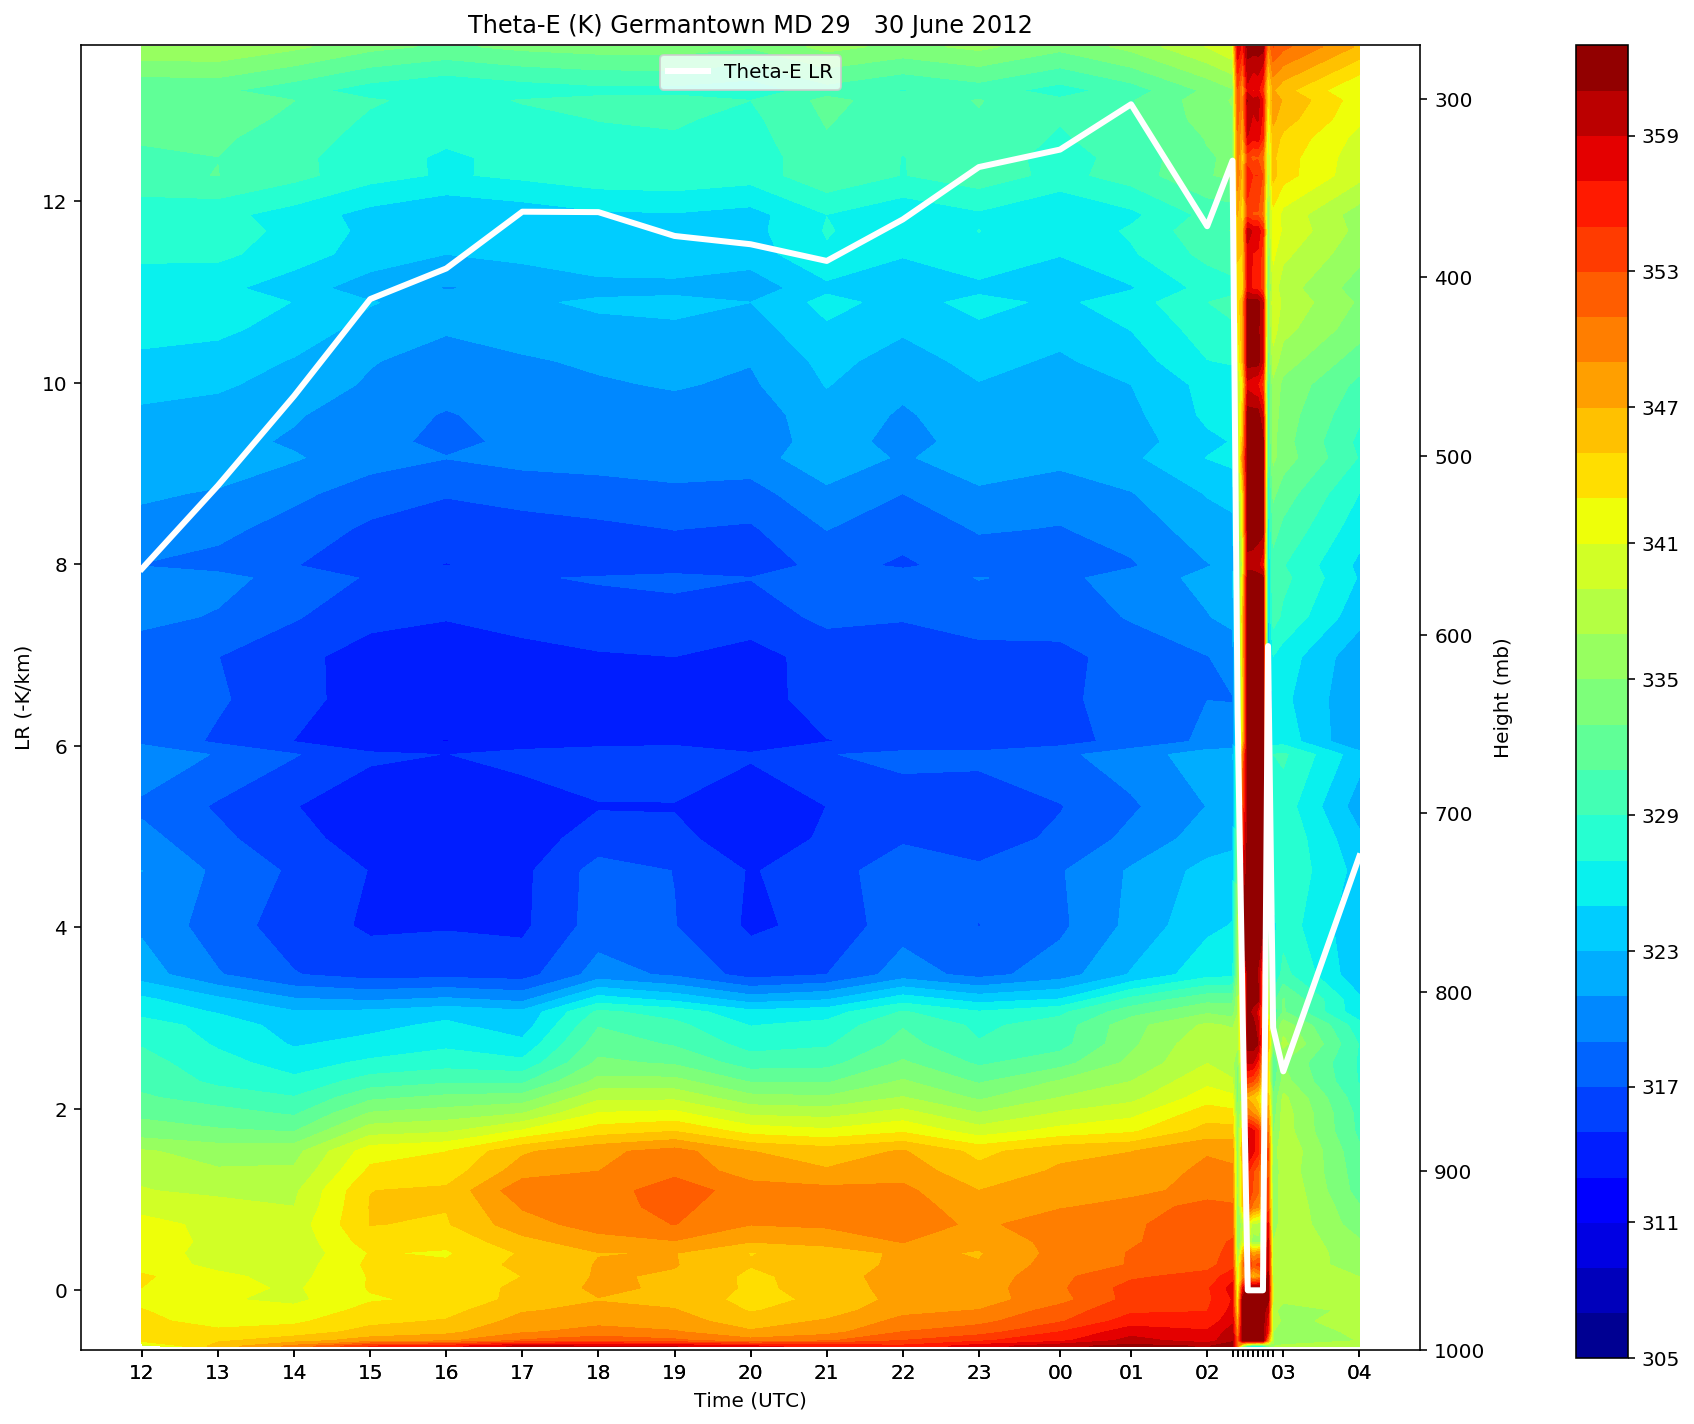

'\nfig = plt.figure(figsize=(12,12))\nax = fig.add_subplot(111) # main axes\ncf = ax.contourf(timeutc, prlevs, WBT, cmap=cm.jet, levels = levels_WBT)\nplt.ylim(1000,270)\nax.set_xticks(time)\nax.set_xticklabels(labels)\nplt.colorbar(cf)\nplt.xlabel("Time (UTC)")\nplt.ylabel("Height (mb)")\nplt.title("Wet-bulb Temperature (C) Germantown MD 29-30 June 2012")\nplt.savefig("wbt_germ_0629_30.png",dpi=250,bbox_inches=\'tight\')\n#plt.grid(True)\nplt.show()\n'

In [5]:
'''
Germantown MD MWR Hovmoller Diagrams 29-30 June 2012
'''

tprof = 'mwr_germ_0629_Tprof_12_04.txt'
rhprof = 'mwr_germ_0629_RHprof_12_04.txt'

T_press = np.loadtxt(tprof, usecols=range(1, 28), skiprows=1, unpack=True)
RH_press = np.loadtxt(rhprof, usecols=range(1, 28), skiprows=1, unpack=True)
print("T_press = ", T_press)
print("T_press shape = ", T_press.shape)
print("RH_press = ", RH_press)
print("RH_press shape = ", RH_press.shape)

T = T_press[1:28,:]
T_K = T.T
RH = RH_press[1:28,:]
RH_pct = RH.T
pressure_mb = T_press[0,:]
press = pressure_mb.tolist()
print("Pressure : ", press, len(press))
time = [720,780,840,900,960,1020,1080,1140,1200,1260,1320,1380,1444,1500,1560,1580,1584,1588,1592,1596,1600,
        1604,1608,1612,1620,1680]
maxpress = max(press)
minpress = min(press)
maxtime = max(time)
mintime = min(time)
print("Latest time = ", maxtime)
timez = np.array([720,780,840,900,960,1020,1080,1140,1200,1260,1320,1380,1444,1500,1560,1580,1584,1588,1592,1596,1600,
        1604,1608,1612,1620,1680])
print("Time: ", time, len(time))
print("Pressure in mb: ", pressure_mb, pressure_mb.shape)
print("Temperature in K: ", T_K, T_K.shape)
T_C = T_K - 273.15
timeutc, prlevs = np.meshgrid(timez, pressure_mb)
print("Time: ", timeutc, timeutc.shape)
print("Pr levels: ", prlevs, prlevs.shape)
TD_C = 243.04*((np.log(RH_pct/100))+((17.625*T_C)/(243.04+T_C)))/(17.625-(np.log(RH_pct/100))-((17.625*T_C)/(243.04+T_C)))
TD = TD_C + 273.15
WBT = T_C*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(T_C+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
Theta = T_K*((1000/prlevs)**0.286)
print("Theta in K: ", Theta, Theta.shape)
TH_min = np.amin(Theta)
TH_max = np.amax(Theta)
T_min = np.amin(T_K)
T_max = np.amax(T_K)
RH_min = np.amin(RH_pct)
RH_max = np.amax(RH_pct)
TD_C_min = np.amin(TD_C)
TD_C_max = np.amax(TD_C)
WBT_min = np.amin(WBT)
WBT_max = np.amax(WBT)
print("Theta min, Theta max = %f K %f K" % (TH_min, TH_max))
print("Temp min, Temp max = %f K %f K" % (T_min, T_max))
print("RH min, RH max = %f %f" % (RH_min, RH_max))
print("TD min, TD max = %f %f" % (TD_C_min, TD_C_max))
print("WBT min, WBT max = %f %f" % (WBT_min, WBT_max))

ThetaE = (273.15 + T_C)*((1000/prlevs)**0.286)+(3 * (RH_pct * (3.884266 * 10**
         ((7.5 * T_C)/(237.7 + T_C)))/100))
THe_sfc = ThetaE[1,:]
THe_top = ThetaE[29,:]
delta_zkm = 3.15
THe_min = np.amin(ThetaE)
THe_max = np.amax(ThetaE)
THe_mean = np.mean(ThetaE)
ThetaE[ThetaE>362]=362
print("Thetae: ", ThetaE, ThetaE.shape)
print("Thetae min, Thetae max = %f K %f K" % (THe_min, THe_max))

levels_TH = np.arange(290,370,2)
levels_T = np.arange(225,310,2)
levels_RH = np.arange(20,100,2)
levels_TE = np.arange(305,365,2)
levels_WBT = np.arange(-40,35,0.5)
labels = ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', 
         '01', '02', '', '', '', '', '', '', '', '', '', '03', '04']

gamma_ThetaE = (THe_sfc - THe_top)/(delta_zkm)
print("Gamma Theta-e = ", gamma_ThetaE)
"""
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, T_K, cmap=cm.jet, levels = levels_T)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Temperature (K) Germantown MD 29-30 June 2012")
plt.savefig("tempK_germ_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, Theta, cmap=cm.jet, levels = levels_TH)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta (K) Germantown MD 29-30 June 2012")
plt.savefig("thta_germ_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta-E (K) Germantown MD 29-30 June 2012")
plt.savefig("thtae_germ_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()
"""
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111) # main axes
cf = ax1.contourf(timeutc, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
ax1.set_ylim(1000,270)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_xticks(time)
ax1.set_xticklabels(labels)
ax1.set_xlabel("Time (UTC)")
ax1.set_ylabel("Height (mb)")
ax1.set_title("Theta-E (K) Germantown MD 29   30 June 2012")
ax2 = fig.add_subplot(111, sharex=ax1, frameon=False) # main axes
ax2.plot(timez,gamma_ThetaE,color='white',linewidth=3,label='Theta-E LR')
ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("LR (-K/km)")
ax2.legend(loc='upper center')
# Adding the colorbar
cbaxes = fig.add_axes([0.99, 0.12, 0.03, 0.76]) 
cb = plt.colorbar(cf,cax = cbaxes)
plt.savefig("thtae_lr_germ_0629_30.png",dpi=700,bbox_inches='tight')
plt.show()
"""
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, WBT, cmap=cm.jet, levels = levels_WBT)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Wet-bulb Temperature (C) Germantown MD 29-30 June 2012")
plt.savefig("wbt_germ_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()
"""

T_press =  [[998.1   995.    990.    ... 301.    295.5   271.   ]
 [298.821 300.602 301.153 ... 247.815 245.853 243.522]
 [303.45  302.872 302.578 ... 248.596 246.516 244.106]
 ...
 [303.099 304.667 305.533 ... 249.7   248.321 245.742]
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]]
T_press shape =  (19, 57)
RH_press =  [[998.1   995.    990.    ... 301.    295.5   271.   ]
 [ 70.57   65.905  62.937 ...  36.378  37.368  36.321]
 [ 56.801  55.293  55.327 ...  30.342  31.263  31.799]
 ...
 [ 71.033  65.267  62.419 ...  46.423  40.87   38.766]
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]]
RH_press shape =  (19, 57)
Pressure :  [998.1, 995.0, 990.0, 984.0, 978.0, 972.0, 965.5, 959.0, 952.5, 946.0, 939.7, 930.0, 920.0, 911.0, 900.0, 889.0, 877.6, 868.0, 859.0, 850.0, 839.5, 829.0, 818.5, 811.0, 804.0, 790.1, 762.8, 732.0, 714.0, 696.0, 667.0, 659.7, 636.0, 612.3, 5

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in true_divide


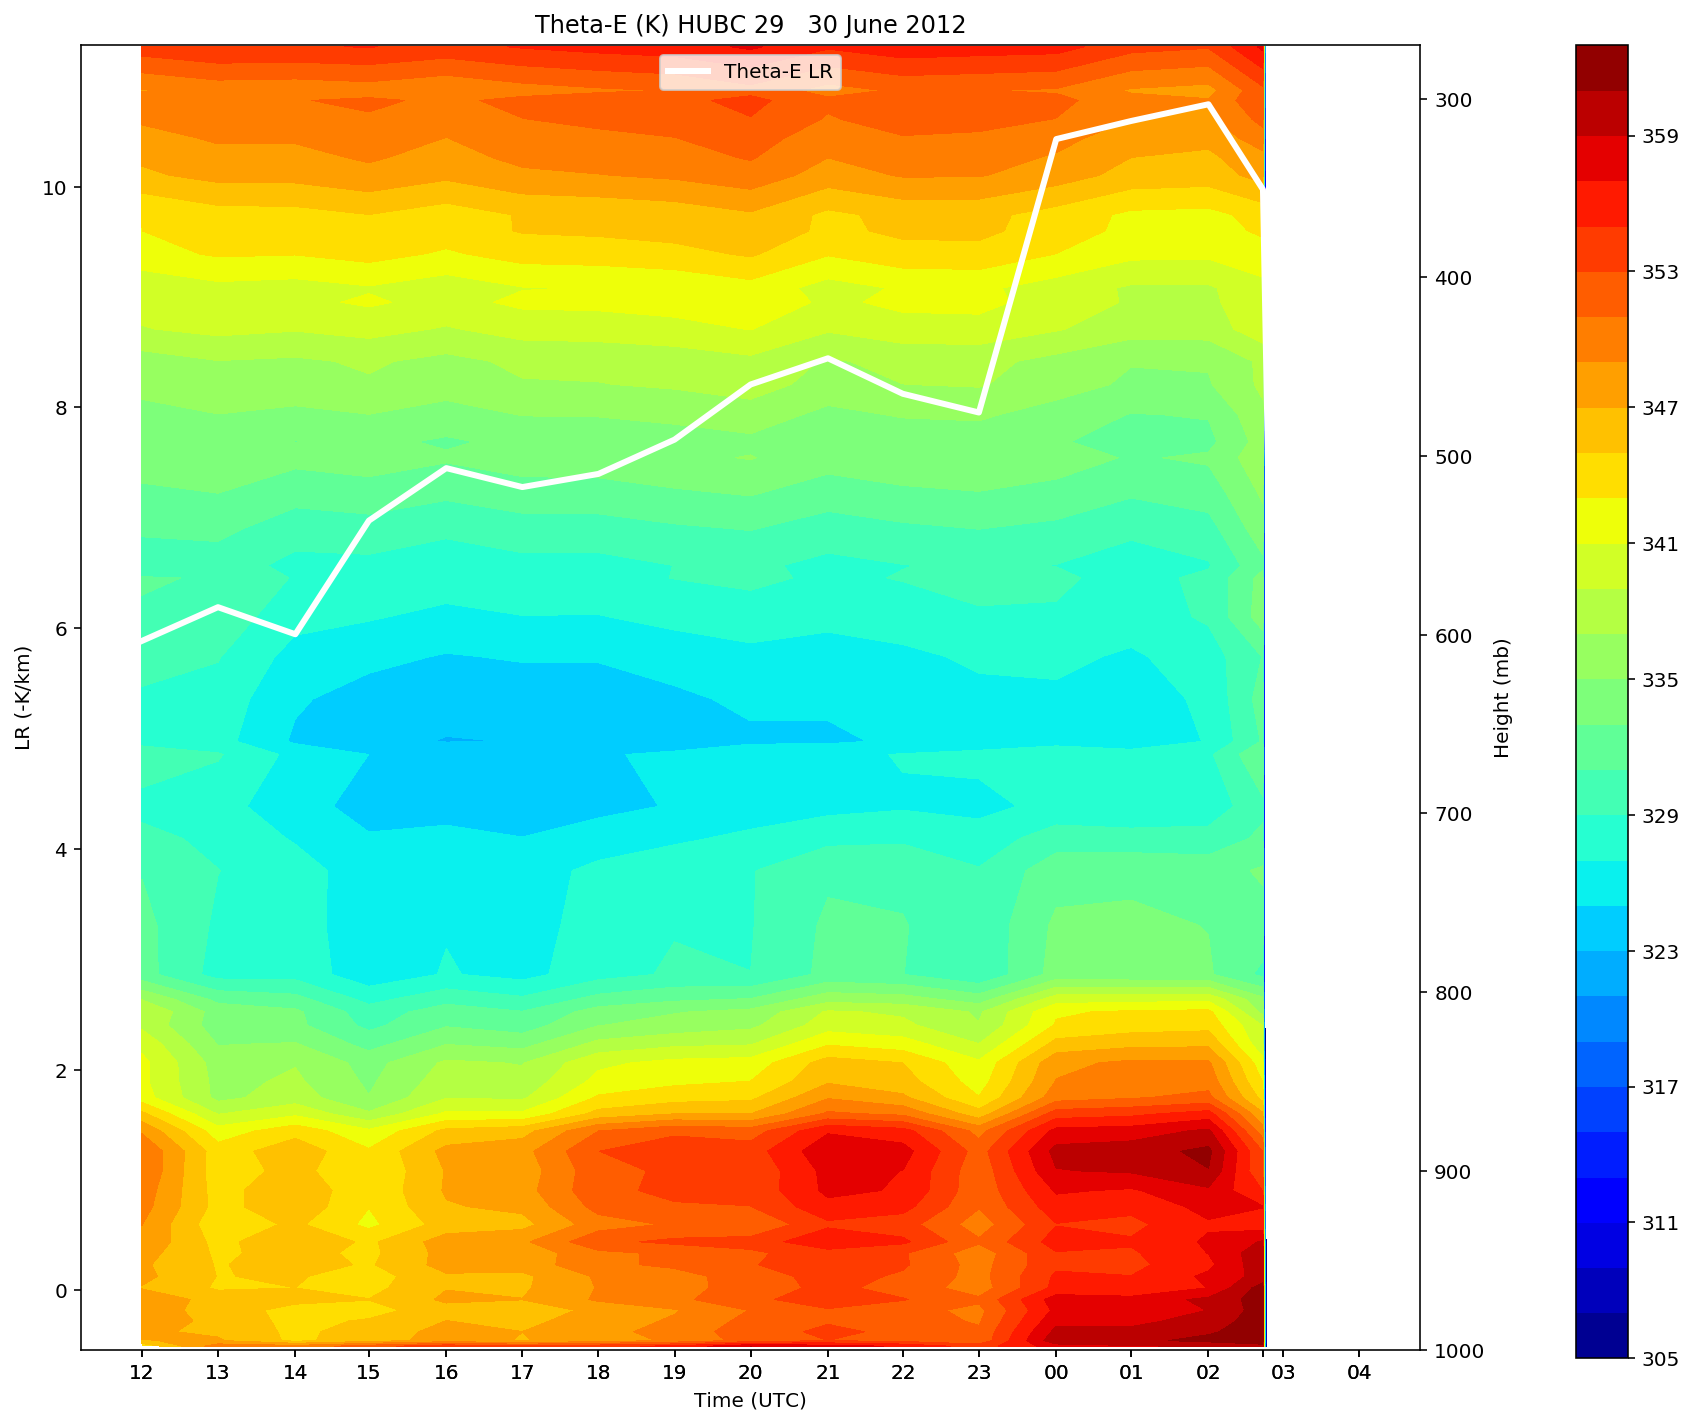

'\nfig = plt.figure(figsize=(12,12))\nax = fig.add_subplot(111) # main axes\ncf = ax.contourf(timeutc, prlevs, WBT, cmap=cm.jet, levels = levels_WBT)\nplt.ylim(1000,270)\nax.set_xticks(time)\nax.set_xticklabels(labels)\nplt.colorbar(cf)\nplt.xlabel("Time (UTC)")\nplt.ylabel("Height (mb)")\nplt.title("Wet-bulb Temperature (C) HUBC 29-30 June 2012")\nplt.savefig("wbt_hubc_0629_30.png",dpi=250,bbox_inches=\'tight\')\n#plt.grid(True)\nplt.show()\n'

In [6]:
'''
HUBC MD MWR Hovmoller Diagrams 29-30 June 2012
'''

tprof = 'mwr_hubc_0629_Tprof_12_04.txt'
rhprof = 'mwr_hubc_0629_RHprof_12_04.txt'

T_press = np.loadtxt(tprof, usecols=range(1, 20), skiprows=1, unpack=True)
RH_press = np.loadtxt(rhprof, usecols=range(1, 20), skiprows=1, unpack=True)
print("T_press = ", T_press)
print("T_press shape = ", T_press.shape)
print("RH_press = ", RH_press)
print("RH_press shape = ", RH_press.shape)

T = T_press[1:20,:]
T_K = T.T
RH = RH_press[1:20,:]
RH_pct = RH.T
pressure_mb = T_press[0,:]
press = pressure_mb.tolist()
print("Pressure : ", press, len(press))
time = [720,780,841,899,960,1020,1080,1140,1200,1261,1320,1380,1441,1500,1561,1604,1620,1680]
maxpress = max(press)
minpress = min(press)
maxtime = max(time)
mintime = min(time)
print("Latest time = ", maxtime)
timez = np.array([720,780,841,899,960,1020,1080,1140,1200,1261,1320,1380,1441,1500,1561,1604,1620,1680])
print("Time: ", time, len(time))
print("Pressure in mb: ", pressure_mb, pressure_mb.shape)
print("Temperature in K: ", T_K, T_K.shape)
T_C = T_K - 273.15
timeutc, prlevs = np.meshgrid(timez, pressure_mb)
print("Time: ", timeutc, timeutc.shape)
print("Pr levels: ", prlevs, prlevs.shape)
TD_C = 243.04*((np.log(RH_pct/100))+((17.625*T_C)/(243.04+T_C)))/(17.625-(np.log(RH_pct/100))-((17.625*T_C)/(243.04+T_C)))
TD = TD_C + 273.15
WBT = T_C*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(T_C+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
Theta = T_K*((1000/prlevs)**0.286)
print("Theta in K: ", Theta, Theta.shape)
TH_min = np.amin(Theta)
TH_max = np.amax(Theta)
T_min = np.amin(T_K)
T_max = np.amax(T_K)
RH_min = np.amin(RH_pct)
RH_max = np.amax(RH_pct)
TD_C_min = np.amin(TD_C)
TD_C_max = np.amax(TD_C)
WBT_min = np.amin(WBT)
WBT_max = np.amax(WBT)
print("Theta min, Theta max = %f K %f K" % (TH_min, TH_max))
print("Temp min, Temp max = %f K %f K" % (T_min, T_max))
print("RH min, RH max = %f %f" % (RH_min, RH_max))
print("TD min, TD max = %f %f" % (TD_C_min, TD_C_max))
print("WBT min, WBT max = %f %f" % (WBT_min, WBT_max))

ThetaE = (273.15 + T_C)*((1000/prlevs)**0.286)+(3 * (RH_pct * (3.884266 * 10**
         ((7.5 * T_C)/(237.7 + T_C)))/100))
THe_sfc = ThetaE[1,:]
THe_top = ThetaE[29,:]
delta_zkm = 3.15
THe_min = np.amin(ThetaE)
THe_max = np.amax(ThetaE)
THe_mean = np.mean(ThetaE)
ThetaE[ThetaE>362]=362
print("Thetae: ", ThetaE, ThetaE.shape)
print("Thetae min, Thetae max = %f K %f K" % (THe_min, THe_max))

levels_TH = np.arange(290,360,2)
levels_T = np.arange(225,315,2)
levels_RH = np.arange(20,100,2)
levels_TE = np.arange(305,365,2)
levels_WBT = np.arange(-40,30,0.5)
labels = ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', 
         '01', '02', '', '03', '04']

gamma_ThetaE = (THe_sfc - THe_top)/(delta_zkm)
print("Gamma Theta-e = ", gamma_ThetaE)
"""
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, T_K, cmap=cm.jet, levels = levels_T)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Temperature (K) HUBC 29-30 June 2012")
plt.savefig("tempK_hubc_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, Theta, cmap=cm.jet, levels = levels_TH)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta (K) HUBC 29-30 June 2012")
plt.savefig("thta_hubc_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Theta-E (K) HUBC 29-30 June 2012")
plt.savefig("thtae_hubc_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()
"""
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111) # main axes
cf = ax1.contourf(timeutc, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
ax1.set_ylim(1000,270)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_xticks(time)
ax1.set_xticklabels(labels)
ax1.set_xlabel("Time (UTC)")
ax1.set_ylabel("Height (mb)")
ax1.set_title("Theta-E (K) HUBC 29   30 June 2012")
ax2 = fig.add_subplot(111, sharex=ax1, frameon=False) # main axes
ax2.plot(timez,gamma_ThetaE,color='white',linewidth=3,label='Theta-E LR')
ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("LR (-K/km)")
ax2.legend(loc='upper center')
# Adding the colorbar
cbaxes = fig.add_axes([0.99, 0.12, 0.03, 0.76]) 
cb = plt.colorbar(cf,cax = cbaxes)
plt.savefig("thtae_lr_hubc_0629_30.png",dpi=700,bbox_inches='tight')
plt.show()
"""
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # main axes
cf = ax.contourf(timeutc, prlevs, WBT, cmap=cm.jet, levels = levels_WBT)
plt.ylim(1000,270)
ax.set_xticks(time)
ax.set_xticklabels(labels)
plt.colorbar(cf)
plt.xlabel("Time (UTC)")
plt.ylabel("Height (mb)")
plt.title("Wet-bulb Temperature (C) HUBC 29-30 June 2012")
plt.savefig("wbt_hubc_0629_30.png",dpi=250,bbox_inches='tight')
#plt.grid(True)
plt.show()
"""